<a href="https://colab.research.google.com/github/JParraArias/SignalsAndSystems2024-2/blob/main/Audio_detector_Parcial%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulación Punto #4

In [53]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

import os
import yt_dlp as youtube_dl

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.1.26-py3-none-any.whl size=2928467 sha256=23643b2a243238091811ead7e689f91be5ea5dcdde8cb29257864cb7316760d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-nqi2cljv/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp
  Attempting uninstall: yt-dlp
    Found existing installation: yt-dlp 2025.1.26
    Uninstalling yt-dlp-2025.1.26:
      Successfully uninstalled yt-dlp-2025.1.26


In [54]:
#cargar datos desde drive acceso libre
FILEID = "18S3b3P2ApgTJMCdP6KBS5P0mQpJ5A4iz"


!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  audios.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

--2025-02-04 00:10:19--  https://docs.google.com/uc?export=download&confirm=&id=18S3b3P2ApgTJMCdP6KBS5P0mQpJ5A4iz
Resolving docs.google.com (docs.google.com)... 74.125.195.113, 74.125.195.101, 74.125.195.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=18S3b3P2ApgTJMCdP6KBS5P0mQpJ5A4iz&export=download [following]
--2025-02-04 00:10:19--  https://drive.usercontent.google.com/download?id=18S3b3P2ApgTJMCdP6KBS5P0mQpJ5A4iz&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.142.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12312 (12K) [application/octet-stream]
Saving to: ‘audios.xlsx’

audios.xlsx         100%[===================>]  12.02K  --.-KB/s  

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_ = 'audios.xlsx'#leer archivo xlsx con link, band, type
X  = pd.read_excel(file_)
X#imprimir filas iniciales

,link,band,type,type_num
0,https://youtu.be/77csUK9yKRk,Juan M,Correcta,1
1,https://youtu.be/3rrZOrAYWs0,Juan M,Correcta,1
2,https://youtu.be/77Hupis8K5E,Juan M,Correcta,1
3,https://youtu.be/t0ZKjT3bFGA,Juan M,Correcta,1
4,https://youtu.be/IXODRKDWdc4,Juan M,Correcta,1
...,...,...,...,...
60,https://youtu.be/FI5jOVy-VMw,Leandro,Correcta,1
61,https://youtu.be/KbPWSdiYhXo,Leandro,Correcta,1
62,https://youtu.be/72I4P7cz6lc,Leandro,Correcta,1
63,https://youtu.be/HNuFr9DbjVo,Leandro,Correcta,1


In [56]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {X.loc[n,'link']}\n")
    print(f"band: {X.loc[n,'band']}\n")
    print(f"type: {X.loc[n,'type']}\n")
    #ruta video n-th
    name_ = 'results/'+X.loc[n,'band']+"_"+str(n)+"_"+str(X.loc[n,'type_num']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(X.loc[n,'link'],name_)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                   name_+'.wav'])

video 1 de 65
link: https://youtu.be/77csUK9yKRk

band: Juan M

type: Correcta

[youtube] Extracting URL: https://youtu.be/77csUK9yKRk
[youtube] 77csUK9yKRk: Downloading webpage
[youtube] 77csUK9yKRk: Downloading tv client config
[youtube] 77csUK9yKRk: Downloading player 0f7c1eff
[youtube] 77csUK9yKRk: Downloading tv player API JSON
[youtube] 77csUK9yKRk: Downloading ios player API JSON
[youtube] 77csUK9yKRk: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=77csUK9yKRk
[youtube] 77csUK9yKRk: Downloading webpage
[youtube] 77csUK9yKRk: Downloading tv client config
[youtube] 77csUK9yKRk: Downloading player 0f7c1eff
[youtube] 77csUK9yKRk: Downloading tv player API JSON
[youtube] 77csUK9yKRk: Downloading ios player API JSON
[youtube] 77csUK9yKRk: Downloading m3u8 information
[info] 77csUK9yKRk: Downloading 1 format(s): 251
[download] Destination: results/Juan M_0_1.mp3
[download] 100% of   39.78KiB in 00:00:00 at 154.69KiB/s 
Download complete... result

In [57]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['Leandro_53_1.wav',
 'Leandro_62_1.wav',
 'Cristian_31_1.wav',
 'Cristian_24_1.wav',
 'Leandro_58_1.wav',
 'Juan M_6_1.wav',
 'Cristian_28_1.wav',
 'Juan M_5_1.wav',
 'Juan M_22_1.wav',
 'Leandro_64_1.wav',
 'Juan M_11_1.wav',
 'Juan M_12_1.wav',
 'Juan M_10_1.wav',
 'Juan M_16_1.wav',
 'Leandro_50_1.wav',
 'Juan M_1_1.wav',
 'Juan M_15_1.wav',
 'Leandro_44_1.wav',
 'Juan M_19_1.wav',
 'Leandro_61_1.wav',
 'Juan M_9_1.wav',
 'Leandro_43_1.wav',
 'Juan M_2_1.wav',
 'Cristian_30_1.wav',
 'Leandro_51_1.wav',
 'Cristian_23_1.wav',
 'Leandro_63_1.wav',
 'Juan M_18_1.wav',
 'Juan M_4_1.wav',
 'Leandro_57_1.wav',
 'Leandro_52_1.wav',
 'Cristian_39_2.wav',
 'Leandro_46_1.wav',
 'Cristian_32_1.wav',
 'Cristian_25_1.wav',
 'Cristian_42_2.wav',
 'Cristian_38_2.wav',
 'Leandro_56_1.wav',
 'Leandro_49_1.wav',
 'Cristian_37_2.wav',
 'Juan M_17_1.wav',
 'Juan M_20_1.wav',
 'Leandro_59_1.wav',
 'Leandro_48_1.wav',
 'Leandro_60_1.wav',
 'Cristian_27_1.wav',
 'Cristian_40_2.wav',
 'Cristian_34_2.wav',


In [58]:
!pip install soundfile #instalar sondfile

In [59]:
import numpy as np
import soundfile as sf  # Para instalar: pip install soundfile

# Parámetros
fs = 48000  # Frecuencia de muestreo esperada
ts = 3  # Duración del segmento en segundos
tl = np.array([0])  # Solo un punto de inicio (0 segundos), ya que los audios son cortos
Ns = len(wav_files) * len(tl)  # Cantidad de segmentos (uno por audio)
x_t = np.zeros((Ns, int(ts * fs), 2))  # Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns, 1))  # Vector tipo de género
name_c = []

# Leer archivos wav
i = 0
for name in wav_files:
    # Leer archivo de audio
    x, file_fs = sf.read(path + name)

    # Verificar si la frecuencia de muestreo es diferente de la esperada
    if file_fs != fs:
        print(f"Advertencia: {name} tiene una frecuencia de muestreo {file_fs}, esperada {fs}.")
        continue  # Saltar este archivo

    # Verificar si el archivo tiene menos de 3 segundos
    audio_duration = x.shape[0] / file_fs  # Duración en segundos
    if audio_duration < ts:
        # Rellenar con ceros para que tenga exactamente 3 segundos
        padding = np.zeros((int(ts * fs) - x.shape[0], x.shape[1]))
        x = np.vstack((x, padding))
        print(f"Audio {name} rellenado con ceros (duración original: {audio_duration}s).")

    # Extraer segmento desde el inicio (0 segundos)
    start_idx = 0
    end_idx = int(ts * fs)
    segment = x[start_idx:end_idx, :]

    # Verificar si el archivo tiene 2 canales
    if segment.shape[1] != 2:
        print(f"Advertencia: {name} no tiene 2 canales. Se ignorará.")
        continue

    # Asignar segmento al conjunto final
    x_t[i] = segment
    label[i] = int(name[-5])  # Tipo de género (asumido como el quinto carácter desde el final del nombre)
    name_c += [name[:-6]]
    print(f"{i} lectura: {name}; segmento extraído; tipo música {label[i]}")
    i += 1

# Imprimir resultado final
print(f"Forma final de x_t: {x_t[:i].shape}")
print(f"Cantidad de segmentos procesados: {i}")


Audio Leandro_53_1.wav rellenado con ceros (duración original: 2.5774166666666667s).
0 lectura: Leandro_53_1.wav; segmento extraído; tipo música [1.]
Audio Leandro_62_1.wav rellenado con ceros (duración original: 2.229125s).
1 lectura: Leandro_62_1.wav; segmento extraído; tipo música [1.]
2 lectura: Cristian_31_1.wav; segmento extraído; tipo música [1.]
3 lectura: Cristian_24_1.wav; segmento extraído; tipo música [1.]
Audio Leandro_58_1.wav rellenado con ceros (duración original: 2.2523541666666667s).
4 lectura: Leandro_58_1.wav; segmento extraído; tipo música [1.]
Audio Juan M_6_1.wav rellenado con ceros (duración original: 2.88s).
5 lectura: Juan M_6_1.wav; segmento extraído; tipo música [1.]
6 lectura: Cristian_28_1.wav; segmento extraído; tipo música [1.]
Audio Juan M_5_1.wav rellenado con ceros (duración original: 2.7733333333333334s).
7 lectura: Juan M_5_1.wav; segmento extraído; tipo música [1.]
Audio Juan M_22_1.wav rellenado con ceros (duración original: 2.6026666666666665s).


In [60]:
from IPython.display import Audio #reproducir segmento
Audio(x_t[55].T,rate=fs)

In [61]:
#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

(65, 72001)

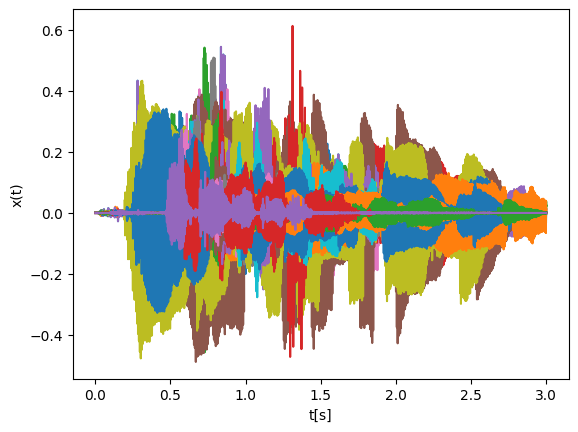

In [62]:
#grafica tiempo y fourier
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

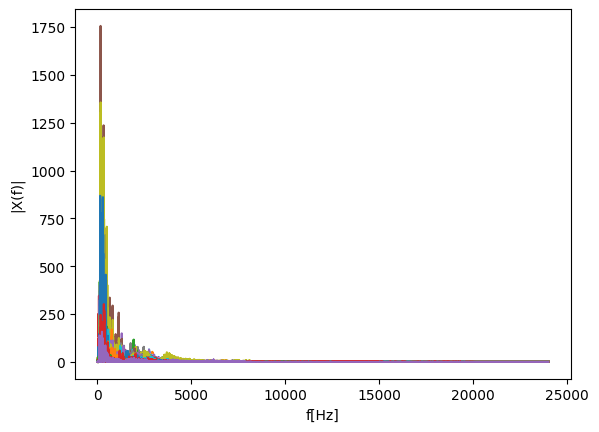

In [63]:
plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

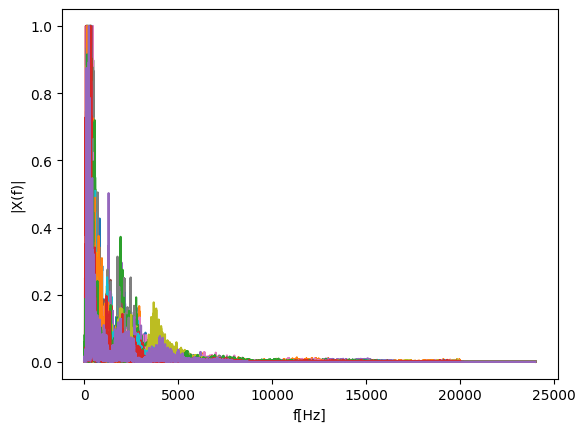

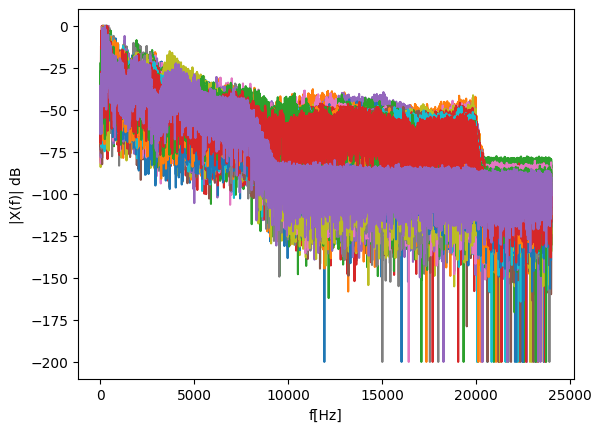

In [64]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

In [65]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#visualización de datos
red_ = TSNE(perplexity = 20,n_components=2,random_state=123,learning_rate='auto',init='pca')
#red_ = PCA(n_components=2,random_state=123)
fmax = 7000
X_2D = red_.fit_transform(Xw_[:,:fmax]) #se tiene en cuenta el espectro hasta fmax Hz

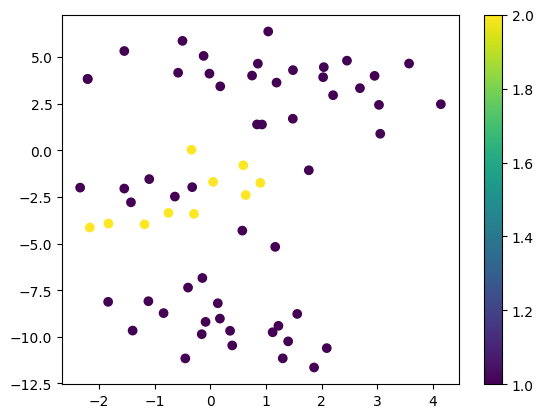

<ipython-input-66-6e94555dcd77>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])


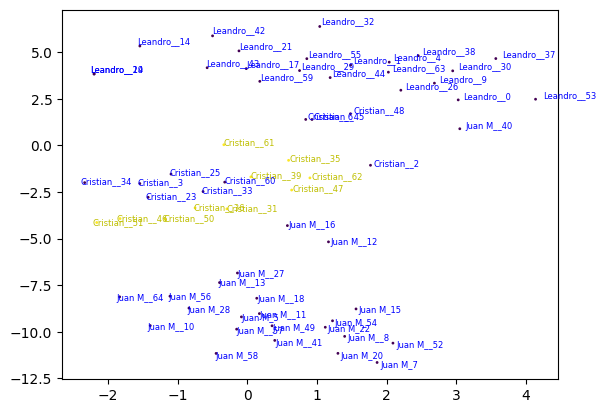

In [66]:
#graficar separabilidad 2D
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()
plt.show()

color_ = ["b","y"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

#plt.colorbar()
plt.show()

In [67]:
#reproducir audio
i=55
Audio(x_t[i].T,rate=fs)

In [68]:
i = 23
Audio(x_t[i].T,rate=fs)

In [69]:
i = 64
Audio(x_t[i].T,rate=fs)

In [70]:
import joblib
#guardar modelo
if not os.path.exists('modelo'):
    os.mkdir('modelo')
filename_ = 'modelo/palabras_clave'
model_ ={'Xw_':Xw_,'fmax': fmax, 'label' : label, 'name_c' : name_c, 'vf':vf,'fs':fs}
joblib.dump(model_,filename_+".pkl")


['modelo/palabras_clave.pkl']

In [71]:
#descargar modelo
#guardar resultados
from google.colab import files
from datetime import date, datetime
import shutil
#guardar resultados
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'modelo'
shutil.make_archive(namefile, 'zip', 'modelo')
files.download(namefile+'.zip')

#el archivo .zip puede cargarse en drive y utilizarse en otro cuaderno para detectar género musical de nuevos segmentos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
#cargar modelo
my_model_loaded = joblib.load(filename_+".pkl")
my_model_loaded.keys()

dict_keys(['Xw_', 'fmax', 'label', 'name_c', 'vf', 'fs'])